# SpikingNetworks.jl

`SpikingNetworks.jl` is a julia package for computational neuroscientists to simulate large scale spiking neural network. It is inspired by [Brain2](http://briansimulator.org/), and achieve most of the functionalities in Brian2 with faster speed, cleaner syntax and flexibility.
[Julia](http://julialang.org) is a technical computing language, which relies on LLVM to achieve efficiency comparable to C. Julia has MATLAB-like syntax and is user-friendly to MATLAB users. This this package aims at experienced computational neuroscientists who want faster speed while don't like the syntax of Brian2 and Python(like me).
To learn some basic syntax of julia, please refer to [Learn Julia in Y minutes](https://learnxinyminutes.com/docs/julia/).

## Installation


In [ ]:
Pkg.clone("https://github.com/YaoLuCNS/SpikingNetworks.git")

## Note
- I recommend you to install [juno IDE](http://junolab.org/) to show unicodes that cannot be displayed well in this documentation
- If you don't want to install julia, use [juliabox](https://www.juliabox.org/) online!

## Tutorial

In [1]:
using SpikingNetworks
using PyPlot

### 1. unit

This macro evaluate some common units in workspace of SpikingNetworks. For instance, the unit of time is ms, so 1*ms=1. To use, just type

In [8]:
@unit;

### 2. parseParameters

This macro evaluate codes in workspace of SpikingNetworks. For example,

In [7]:
parseParameters"""
C=1
gₖ=36
gₙ=120
gₗ=0.3
Eₖ= -12
Eₙ=115
Eₗ= 10.613
Iₑ=10""";

### 3. parseEquations

This macro parse equations in workspace of SpikingNetworks. For example, Hudgekin-Huxley equations are

In [9]:
parseEquations"""
dV/dt=1/C*(-gₖ*n^4*(V-Eₖ)-gₙ*m^3*h*(V-Eₙ) -gₗ*(V-Eₗ)+Iₑ)
dn/dt=αₙ(V)-(αₙ(V)+βₙ(V))*n
dm/dt=αₘ(V)-(αₘ(V)+βₘ(V))*m
dh/dt=αₕ(V)-(αₕ(V)+βₕ(V))*h
αₙ(V)=(0.01*(-V+10))./(exp((-V+10)/10)-1)
βₙ(V)=0.125*exp(-V/80)
αₘ(V)=0.1*(-V+25)./(exp((-V+25)/10)-1)
βₘ(V)=4*exp(-V/18)
αₕ(V)=0.07*exp(-V/20)
βₕ(V)=1./(exp((-V+30)/10)+1)""";

### 4. init

Initialize variables in your differential equations and other variables that your want to use in macros after using ``init``. By default, starting time ``t=0``, integration interval ``dt=0.01``, number of neurons in your network ``N=1``. It returns an object of type ``Network`` to your Main workspace. For example,

In [10]:
net=init"""
V=-10*ones(N)
n=0.0003*ones(N)
m=0.0011*ones(N)
h=0.9998*ones(N)""";

### 5. stateMonitor

This macro records the time evolution of the states of specified neurons. For example,

In [11]:
stateMonitor"[1,3,5]";

### 6. spike

This macro gives the condition in which a neuron will spike. For example,

In [12]:
spike"v.>Vₜ";

### 7. reset

This macro reset a neuron after it spikes.``i`` denotes the indices of spiking neurons. For example,

In [13]:
reset"""
v[i]=Vᵣ""";

### 8. synapse

After a pre-synaptic neuron spikes, this macro will modify states of post-synaptic neurons. For example,

In [14]:
synapse"""
gₑ+=wₑ
gᵢ+=wᵢ""";

### 9. plasticity

This macro modifies synaptic weights according to **Hebbian Learning Rule**. ``i`` denotes pre-synaptic spiking neurons, ``j`` denotes post synaptic neurons. For more detailed description, refer to [Brian2 Turotial](https://brian2.readthedocs.org/en/2.0b4/resources/tutorials/2-intro-to-brian-synapses.html).

In [15]:
plasticity"""
apre[j,i]+=Apre[j,i]
w[j,i]+=apost[j,i]
apost[i,j]+=Apost[i,j]
w[i,j]+=apre[i,j]""";

### 10. run!

Run the network for a given iteration. For example,

In [13]:
run!(net,10000);

### 11. group operations

``SpikingNetworks`` provides you with some functions and macros to divide the whole network into subgroups and do operations on a specific subgroup, or between two subgroups.See [plasticity.jl](https://github.com/YaoLuCNS/SpikingNetworks/blob/master/examples/Plasticity.jl)

groups=makeGroup([group1,group2,...],[number of neurons in group1,...])

@group groups groupi command

@connect groups groupi groupj command

### 12. miscellaneous

- ξ(t) calculates Gauss-White noise.
- If you want to multiply a matrix W and a vector v, use W⊙v instead of W*v to avoid conflict.
- your could file other utility functions in [utility.jl](https://github.com/YaoLuCNS/SpikingNetworks/blob/master/src/utility.jl) or write your own function to it.

## Examples

### 1. Hudgkin-Huxley Model

#### Hudgkin-Huxley Neuron

  1.933917 seconds (2.24 M allocations: 1.599 GB, 16.81% gc time)


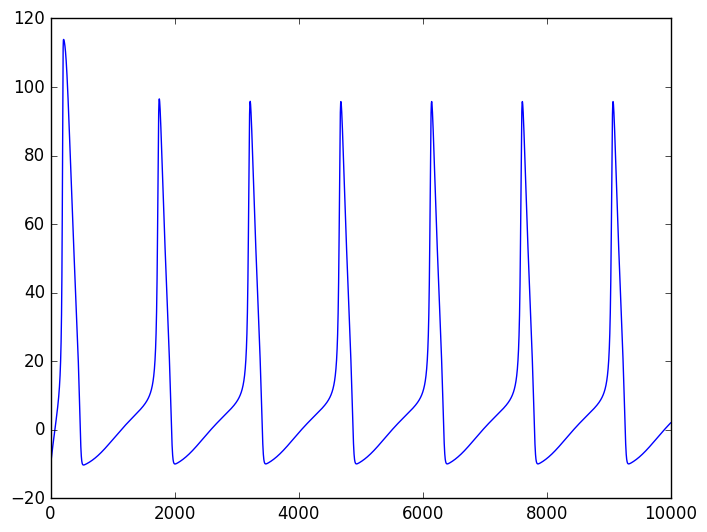

In [4]:
using SpikingNetworks

parseParameters"""
C=1
gₖ=36
gₙ=120
gₗ=0.3
Eₖ= -12
Eₙ=115
Eₗ= 10.613
Iₑ=10"""

parseEquations"""
dV/dt=1/C*(-gₖ*n^4*(V-Eₖ)-gₙ*m^3*h*(V-Eₙ) -gₗ*(V-Eₗ)+Iₑ)
dn/dt=αₙ(V)-(αₙ(V)+βₙ(V))*n
dm/dt=αₘ(V)-(αₘ(V)+βₘ(V))*m
dh/dt=αₕ(V)-(αₕ(V)+βₕ(V))*h
αₙ(V)=(0.01*(-V+10))./(exp((-V+10)/10)-1)
βₙ(V)=0.125*exp(-V/80)
αₘ(V)=0.1*(-V+25)./(exp((-V+25)/10)-1)
βₘ(V)=4*exp(-V/18)
αₕ(V)=0.07*exp(-V/20)
βₕ(V)=1./(exp((-V+30)/10)+1)"""

net=init"""
V=-10*ones(N)
n=0.0003*ones(N)
m=0.0011*ones(N)
h=0.9998*ones(N)"""

stateMonitor"[1]"

@time run!(net,100/net.dt)
using PyPlot
plot(net.VRecord[1,:]');

####  Wang-Buszaki Model

  0.346483 seconds (509.45 k allocations: 96.752 MB, 9.90% gc time)


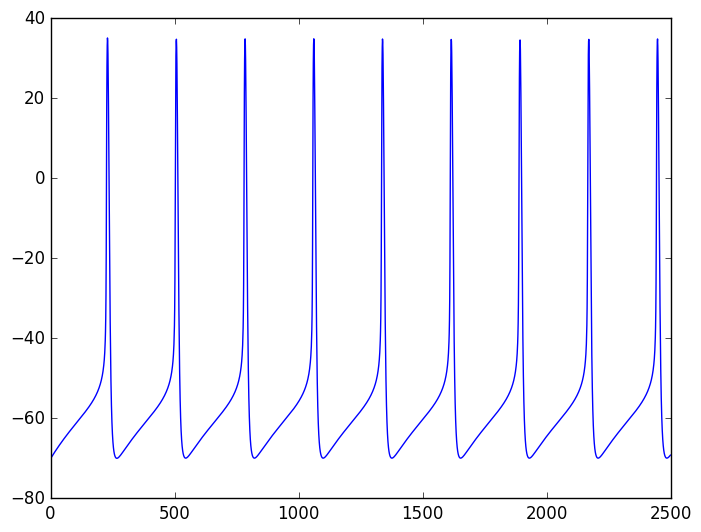

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000022FA89B0>

In [5]:
using SpikingNetworks
@unit
parseParameters"""
Cm = 1*uF
Iapp = 2*uA
gL = 0.1*msiemens
EL = -65*mV
ENa = 55*mV
EK = -90*mV
gNa = 35*msiemens
gK = 9*msiemens"""

parseEquations"""
dv/dt=(-gNa*m(v)^3*h*(v-ENa)-gK*n^4*(v-EK)-gL*(v-EL)+Iapp)/Cm
dh/dt=5*(α_h(v)*(1-h)-β_h(v)*h)
dn/dt=5*(α_n(v)*(1-n)-β_n(v)*n)
m(v)=α_m(v)/(α_m(v)+β_m(v))
α_m(v)=-0.1*(v+35)/(exp(-0.1*(v+35))-1)
β_m(v)=4*exp(-(v+60)/18)
α_h(v)=0.07*exp(-(v+58)/20)
β_h(v)=1./(exp(-0.1*(v+28))+1)
α_n(v)=-0.01*(v+34)/(exp(-0.1*(v+34))-1)
β_n(v)=0.125*exp(-(v+44)/80)"""

net=init"""
v=-70*ones(N)
h=1*ones(N)
n=0*ones(N)"""

stateMonitor"[1]"

net.dt=0.04
@time run!(net,100/net.dt)
using PyPlot
plot(net.vRecord')

#### COBAHH network

In [ ]:
using SpikingNetworks;@unit

parseParameters"""
area = 20000*um^2
Cm = 1*ufarad*cm^(-2)*area
gl = 5e-5*siemens*cm^(-2)*area
El = -65*mVb
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm^(-2)*area
g_kd = 30*msiemens*cm^(-2)*area
VT = -63*mV
taue = 5*ms
taui = 10*ms
Ee = 0*mV
Ei = -80*mV"""

parseParameters"""
N=4000;Ne=4*N÷5;Ni=N÷5;
we=spzeros(N,N);wi=spzeros(N,N)
we[1:N,1:Ne]=sprand(N,Ne,0.02)*6*nS
wi[1:N,Ne+1:N]=sprand(N,Ni,0.02)*67*nS"""

parseEquations"""
dv/dt=(gl*(El-v)+ge*(Ee-v)+gi*(Ei-v)-g_na*m^3*h*(v-ENa)-g_kd*n^4*(v-EK))/Cm
dm/dt=0.32*(13-v+VT)/(exp((13-v+VT)/4)-1)*(1-m)-0.28*(v-VT-40)/(exp((v-VT-40)/5)-1)*m
dn/dt=0.032*(15-v+VT)/(exp((15-v+VT)/5)-1)*(1-n)-0.5*exp((10-v+VT)/40)*n
dh/dt=0.128*exp((17-v+VT)/18)*(1-h)-4/(1+exp((40-v+VT)/5))*h
dge/dt=-ge/taue
dgi/dt=-gi/taui"""

net=init"""
N=N
v=El+5*(randn(N)-1)
m=0*ones(N)
n=0*ones(N)
h=1*ones(N)
ge=(randn(N)*1.5+4)*10*nS
gi=(randn(N)*12+20)*10*nS
we=we
wi=wi"""

spike"""
v.>-20
3"""

synapse"""
ge+=we
gi+=wi"""

stateMonitor"[1,10,100]"

@time run!(net,1000/net.dt)
using PyPlot
plot(net.vRecord');

### 2. Linear Integrate and Fire Model

#### LIF Neuron with Gauss-White Noise

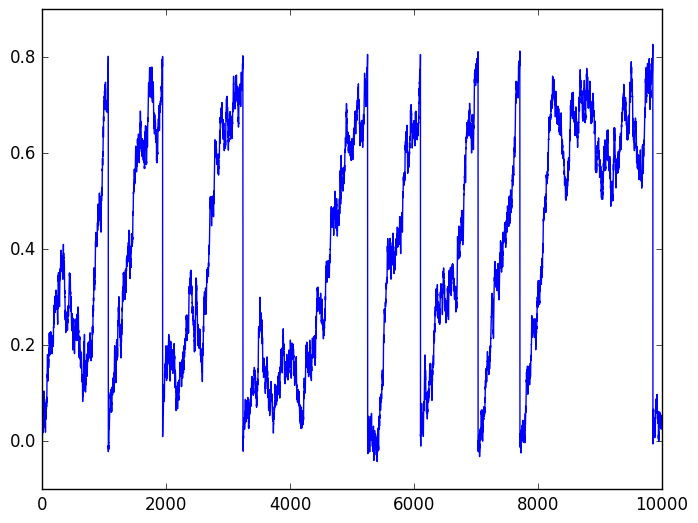

 0.641963 seconds (322.83 k allocations: 435.187 MB, 15.81% gc time)


In [3]:
using SpikingNetworks

parseParameters"""
τ = 10
σ=100"""

parseEquations"""
dv/dt = (Iₑ(t)-v+σ*ξ(t))/τ
Iₑ(t)=1"""

net=init"""
v=zeros(N)"""

stateMonitor"[1]"

spike"v.>0.8"

reset"v[i]=0"

@time run!(net,100/net.dt)
using PyPlot
plot(net.vRecord[1,:]');


#### Simple LIF Network

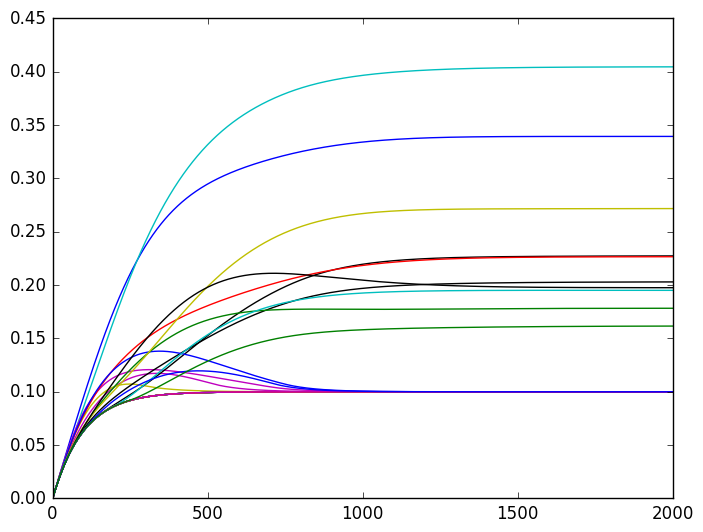

 0.477677 seconds (59.66 k allocations: 472.340 MB, 16.24% gc time)


In [6]:
using SpikingNetworks

parseParameters"""
N=100
τ = 1
W=0.1*randn(N,N)"""

parseEquations"""
dr/dt = (Iₑ(t)-r)/τ+max(W⊙r,0)
Iₑ(t)=0.1"""

net=init"""
N=N
r=zeros(N)"""

stateMonitor"[1:30;]"

@time run!(net,20/net.dt)
using PyPlot
plot(net.rRecord');

#### CUBA network (working memory/self sustained activity)

  0.759239 seconds (205.23 k allocations: 565.635 MB, 15.03% gc time)


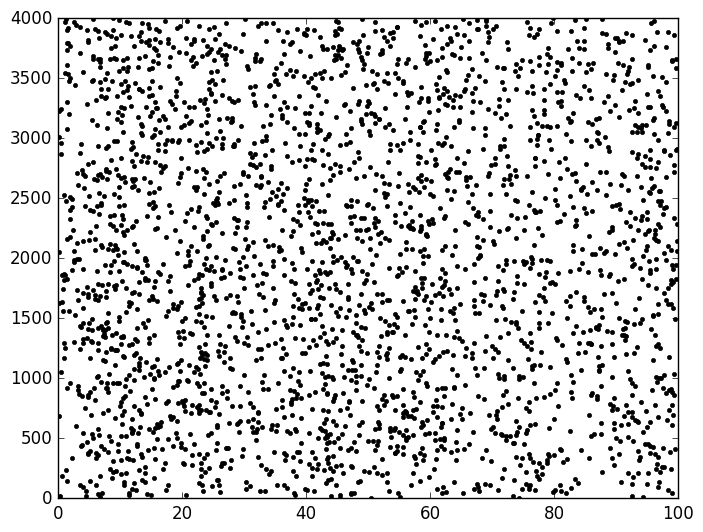

In [3]:
using SpikingNetworks;@unit

parseParameters"""
τₘ = 20*ms
τₑ = 5*ms
τᵢ = 10*ms
Vₜ = -50*mV
Vᵣ = -60*mV
Eₗ = -49*mV
N=4000;M=4*N÷5
wₑ=spzeros(N,N)
wᵢ=spzeros(N,N)
wₑ[1:N,1:M]=sprand(N,M,0.02)*(60*0.27/10)*mV
wᵢ[1:N,M+1:N]=sprand(N,N-M,0.02)*(-20*4.5/10)*mV"""

parseEquations"""
dv/dt=(gₑ+gᵢ-(v-Eₗ))/τₘ
dgₑ/dt=-gₑ/τₑ
dgᵢ/dt=-gᵢ/τᵢ"""

net=init"""
N=N
v=Vᵣ+rand(N)*(Vₜ-Vᵣ)
gₑ=zeros(N)
gᵢ=zeros(N)
wₑ=wₑ
wᵢ=wᵢ"""

spike"v.>Vₜ"
reset"""
v[i]=Vᵣ"""

synapse"""
gₑ+=wₑ
gᵢ+=wᵢ"""

net.dt=0.1
@time run!(net,100/net.dt)
t,neuron=rasterPlot(net)
using PyPlot
plot(t,neuron,".k");

### 3. Izhikevich Model

#### Izhikevich Random Network

  0.445472 seconds (324.41 k allocations: 327.227 MB, 7.79% gc time)


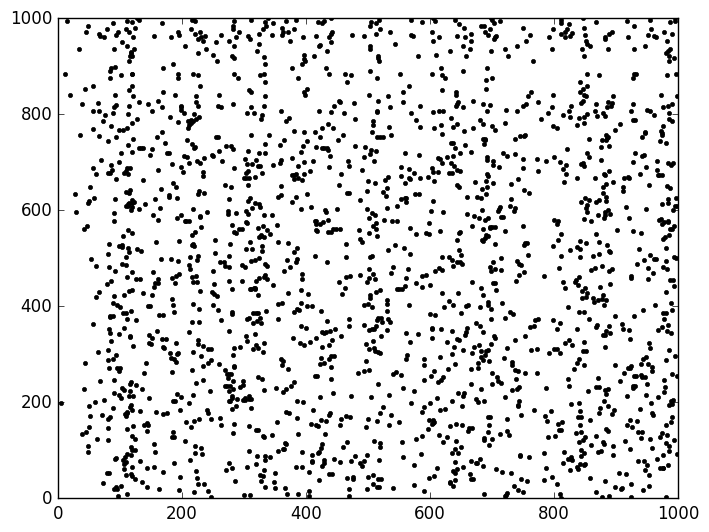

In [5]:
using SpikingNetworks

parseParameters"""
N=1000
Ne=N÷5*4;                 Ni=N÷5;
re=rand(Ne);            ri=rand(Ni);
a=[0.02*ones(Ne);       0.02+0.08*ri];
b=[0.2*ones(Ne);        0.25-0.05*ri];"""

parseEquations"""
dv/dt=0.04*v^2+5*v+140-u+I(t)
du/dt=a*(b*v-u)
I(t)=[5*randn(Ne);2*randn(Ni)]"""

net=init"""
N=N
v=-65*ones(N)
u=b.*v
c=[-65+15*re.^2;        -65*ones(Ni)];
d=[8-6*re.^2;           2*ones(Ni)];
S=[0.5*rand(Ne+Ni,Ne)   -rand(Ne+Ni,Ni)];"""

spike"v.>30"
reset"""
v[i]=c[i]
u[i]+=d[i]"""
synapse"v+=S"

net.dt=0.5
@time run!(net,1000/net.dt)
using PyPlot
t,neuron=rasterPlot(net)
plot(t,neuron,".k");

#### Izhikevich Sparse Network

  3.889706 seconds (786.75 k allocations: 2.919 GB, 16.53% gc time)


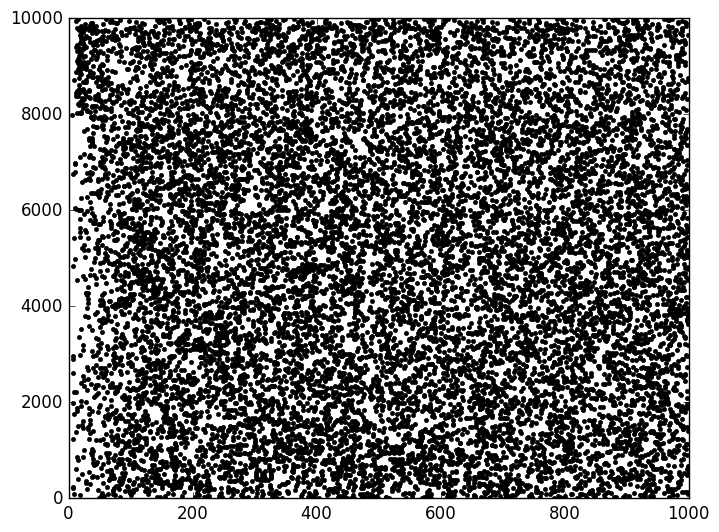

In [8]:
using SpikingNetworks

parseParameters"""
N=10000
Ne=N÷5*4;                 Ni=N÷5;
re=rand(Ne);            ri=rand(Ni);
a=[0.02*ones(Ne);       0.02+0.08*ri];
b=[0.2*ones(Ne);        0.25-0.05*ri];"""

parseEquations"""
dv/dt=0.04*v^2+5*v+140-u+I(t)
du/dt=a*(b*v-u)
I(t)=[5*randn(Ne);2*randn(Ni)]"""

net=init"""
N=N
v=-65*ones(N)
u=b.*v
c=[-65+15*re.^2;        -65*ones(Ni)]
d=[8-6*re.^2;           2*ones(Ni)]
S=[0.5*sprand(N,Ne,0.02) sprand(N,Ni,0.02)]"""

spike"v.>30"
reset"""
v[i]=c[i]
u[i]+=d[i]"""
synapse"v+=S"

net.dt=0.5
@time run!(net,1000/net.dt)
using PyPlot
t,neuron=rasterPlot(net)
plot(t,neuron,".k");

#### Population Activity

  0.494404 seconds (297.37 k allocations: 30.577 MB, 2.24% gc time)


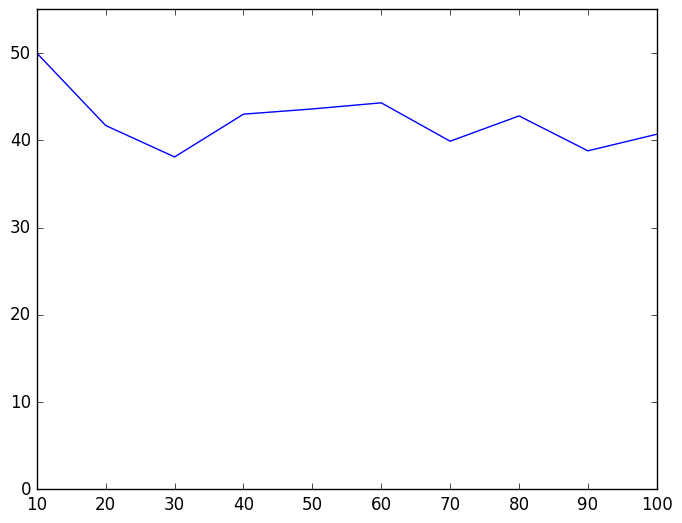

(0,55)

In [4]:
using SpikingNetworks

parseParameters"""
τ = 10
σ=80
Vₜ=0.8
Vᵣ=0
N=100
W=0.1*(ones(N,N)-diagm(ones(N)))"""

parseEquations"""
dv/dt = (Iₑ(t)-v+σ*ξ(t)+W⊙sigmoid(v-0.5))/τ
Iₑ(t)=0.5"""

net=init"""
N=N
v=rand(Vᵣ:0.01:Vₜ,N)"""

spike"v.>Vₜ"
reset"v[i]=Vᵣ"

net.dt=0.1
@time run!(net,100/net.dt)
time,rate=activity(net)
using PyPlot
plot(time,rate);
ylim([0,55])

#### Phase Locking

  0.720461 seconds (415.37 k allocations: 493.454 MB, 13.84% gc time)


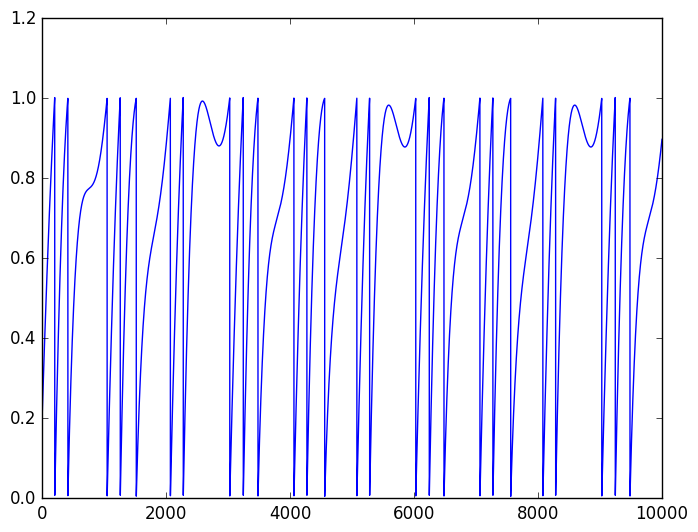

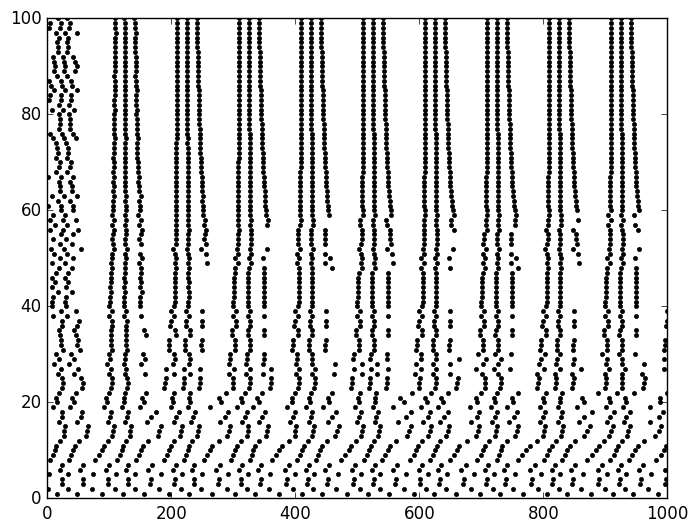

In [12]:
using SpikingNetworks
@unit
parseParameters"""
τ = 20*ms
N= 100
a= [Float64(0.05+0.7*i/N) for i=1:N]
b = 1.2
freq = 10*Hz"""
parseEquations"""
dv/dt=(-v+Iₑ(t))/τ
Iₑ(t)=a*sin(2π*freq*t)+b"""
net=init"""
N=N
v=rand(N)"""
spike"v.>1."
reset"v[i]=0."
stateMonitor"[50]"
net.dt=0.1
@time run!(net,1000/net.dt)

using PyPlot
plot(net.vRecord');
t,neuron=rasterPlot(net)
figure()
plot(t,neuron,".k");

#### Non-reliability

  0.226150 seconds (296.45 k allocations: 62.042 MB, 4.74% gc time)


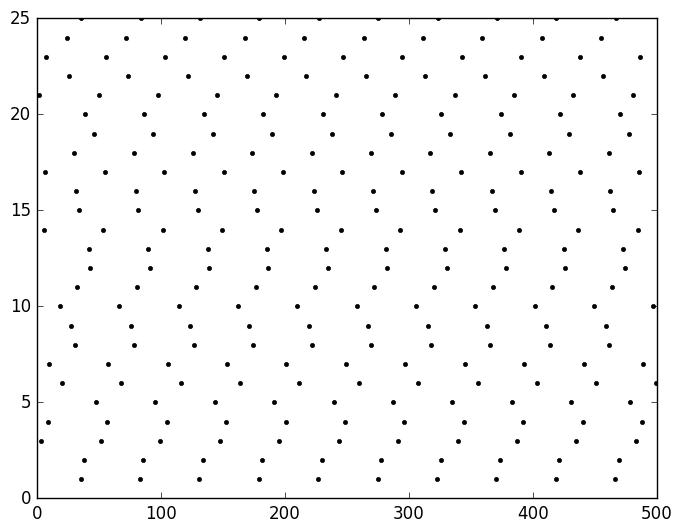

In [10]:
using SpikingNetworks
parseParameters"""
τ=20
σ=0.015"""
parseEquations"""
dv/dt=(1.1-v+σ*ξ(t))/τ"""
net=init"""
N=25
v=rand(N)"""
spike"""
v.>1
5"""
reset"v[i]=0"
net.dt=0.1
@time run!(net,500/net.dt)

using PyPlot
t,neuron=rasterPlot(net)
plot(t,neuron,".k");

#### Reliability

  0.251948 seconds (365.74 k allocations: 73.879 MB, 5.48% gc time)


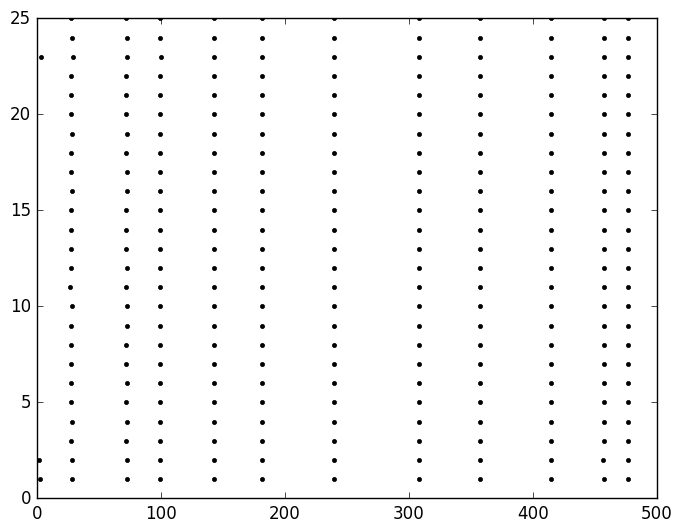

In [14]:
using SpikingNetworks
parseParameters"""
τ=10
τᵢ=5
σ=0.015
σᵢ=20"""
parseEquations"""
dv/dt=(0.9+0.5*Ie-v+σ*ξ(t))/τ
dIe/dt=(-Ie+σᵢ*η(t))/τᵢ"""
net=init"""
N=25
v=rand(N)
Ie=rand()*ones(N)"""
spike"""
v.>1
5"""
reset"v[i]=0"
net.dt=0.1
@time run!(net,500/net.dt)

using PyPlot
t,neuron=rasterPlot(net)
plot(t,neuron,".k");

### 4. IF Curve

#### IF Curve of Integrate and Fire Neuron

  8.075539 seconds (61.70 M allocations: 1.515 GB, 2.36% gc time)


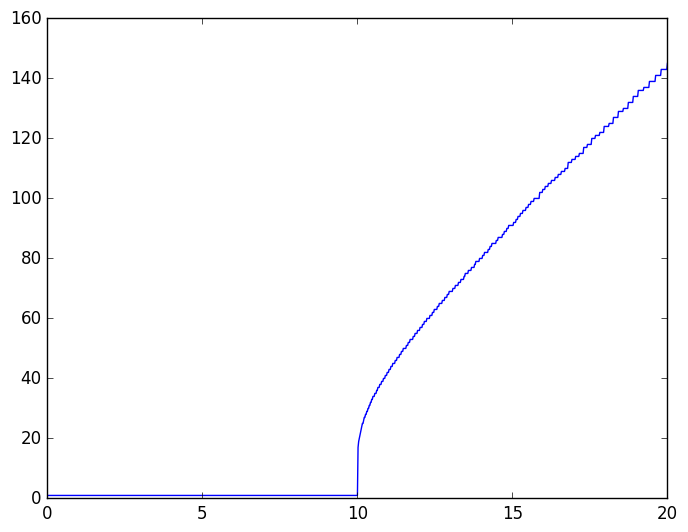

In [17]:
using SpikingNetworks
parseParameters"""
τ=10
N=1000
v0=[20*i/N for i=1:N]"""
parseEquations"""
dv/dt=(v0-v)/τ"""
net=init"""
N=N
v=0*ones(N)"""
spike"""
v.>10
5"""
reset"v[i]=0"

net.dt=0.1
@time run!(net,1000/net.dt)
t,neuron=rasterPlot(net)
using PyPlot
plot(SpikingNetworks.v0,map(x->length(x),net.tSpike));

#### IF Curve of Hodgkin Huxley type I Neuron

 27.746861 seconds (33.99 M allocations: 17.444 GB, 7.72% gc time)


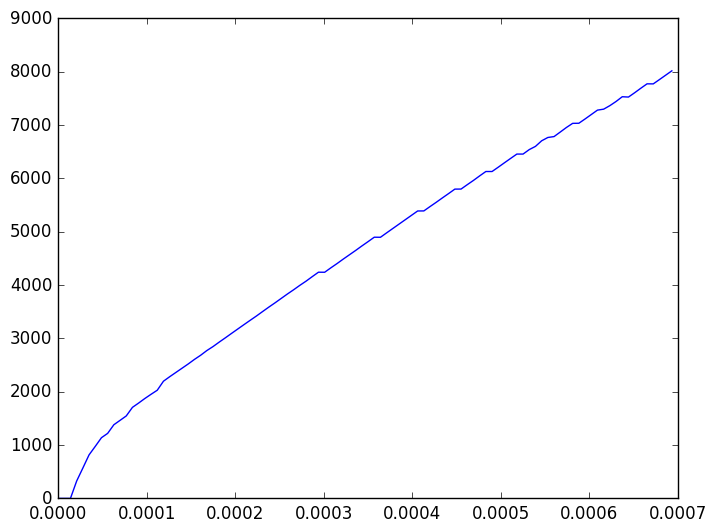

In [6]:
using SpikingNetworks
@unit
parseParameters"""
N=100
area = 20000*um^2
Cm = 1*ufarad*cm^(-2)*area
gl = 5e-5*siemens*cm^(-2)*area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm^(-2)*area
g_kd = 30*msiemens*cm^(-2)*area
VT = -63*mV
I=[Float64(0.7*nA*i/N) for i=0:N-1]"""

parseEquations"""
dv/dt=(gl*(El-v)-g_na*m^3*h*(v-ENa)-g_kd*n^4*(v-EK)+I)/Cm
dm/dt=0.32*(13-v+VT)/(exp((13-v+VT)/4)-1)*(1-m)-0.28*(v-VT-40)/(exp((v-VT-40)/5)-1)*m
dn/dt=0.032*(15-v+VT)/(exp((15-v+VT)/5)-1)*(1-n)-0.5*exp((10-v+VT)/40)*n
dh/dt=0.128*exp((17-v+VT)/18)*(1-h)-4/(1+exp((40-v+VT)/5))*h"""

net=init"""
N=N
v=1.0*El*ones(N)
m=0.*ones(N)
n=0.*ones(N)
h=1.*ones(N)"""
spike"v.>-40"

@time run!(net,1000/net.dt)
t,neuron=rasterPlot(net)
using PyPlot
plot(SpikingNetworks.I,map(x->length(x),net.tSpike));

#### IF Curve of Hodgkin Huxley type II Neuron

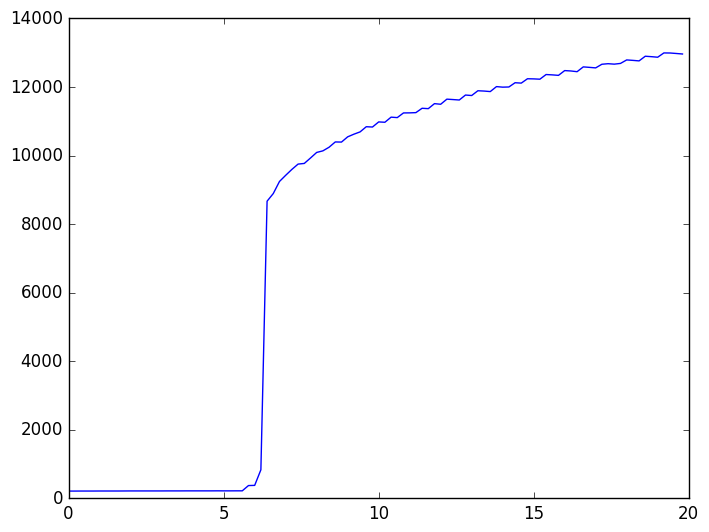

In [9]:
using SpikingNetworks

parseParameters"""
N=100
C=1
gₖ=36
gₙ=120
gₗ=0.3
Eₖ= -12
Eₙ=115
Eₗ= 10.613
Iₑ=20*[Float64(i/N) for i=0:N-1]"""

parseEquations"""
dV/dt=1/C*(-gₖ*n^4*(V-Eₖ)-gₙ*m^3*h*(V-Eₙ) -gₗ*(V-Eₗ)+Iₑ)
dn/dt=αₙ(V)-(αₙ(V)+βₙ(V))*n
dm/dt=αₘ(V)-(αₘ(V)+βₘ(V))*m
dh/dt=αₕ(V)-(αₕ(V)+βₕ(V))*h
αₙ(V)=(0.01*(-V+10))./(exp((-V+10)/10)-1)
βₙ(V)=0.125*exp(-V/80)
αₘ(V)=0.1*(-V+25)./(exp((-V+25)/10)-1)
βₘ(V)=4*exp(-V/18)
αₕ(V)=0.07*exp(-V/20)
βₕ(V)=1./(exp((-V+30)/10)+1)"""

net=init"""
N=N
V=-10*ones(N)
n=0.0003*ones(N)
m=0.0011*ones(N)
h=0.9998*ones(N)"""

spike"V.>40"
@time run!(net,1000/net.dt)
using PyPlot
plot(SpikingNetworks.Iₑ,map(x->length(x),net.tSpike));

### 5. Synaptic Plasticity

  0.439511 seconds (88.63 k allocations: 335.746 MB, 18.11% gc time)


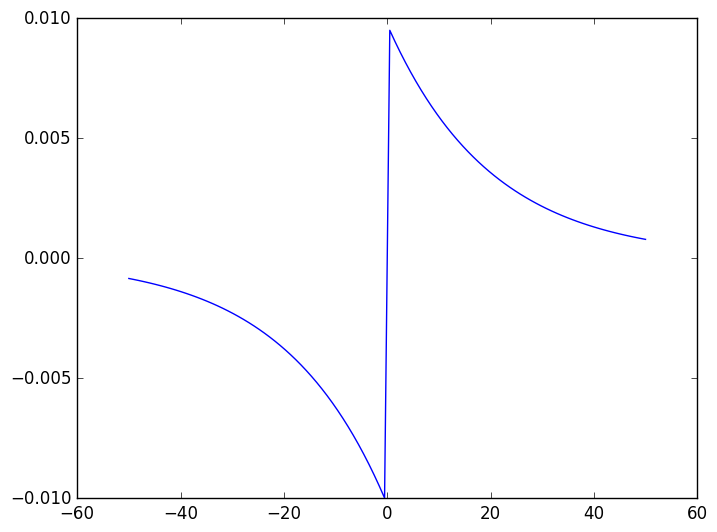

In [2]:
using SpikingNetworks

parseParameters"""
taupre=20
taupost=20
tmax=50"""

parseParameters"""
N=100
groups=makeGroup([1,2],[N,N])
@group groups 1 tspike[i]=(i-1)*tmax/(N-1)
@group groups 2 tspike[i]=(N-i)*tmax/(N-1)
@connect groups 1 2 post==pre Apre[post,pre]=0.01
@connect groups 1 2 post==pre Apost[post,pre]=-0.01*1.05"""

parseEquations"""
dapre/dt=-apre/taupre
dapost/dt=-apost/taupost
dw/dt=0"""

net=init"""
N=200
apre=zeros(N,N)
apost=zeros(N,N)
w=zeros(N,N)
Apre=Apre
Apost=Apost"""

spike"t≂tspike"

plasticity"""
apre[j,i]+=Apre[j,i]
w[j,i]+=apost[j,i]
apost[i,j]+=Apost[i,j]
w[i,j]+=apre[i,j]"""

net.dt=0.5
@time run!(net,60/net.dt)

using SpikingNetworks: groups,tspike
index=sub2ind(size(net.w),groups[2],groups[1])
using PyPlot
plot(tspike[groups[2]]-tspike[groups[1]],net.w[index]);

### 6. ODE (just for fun)

  0.163186 seconds (153.57 k allocations: 52.278 MB, 11.52% gc time)


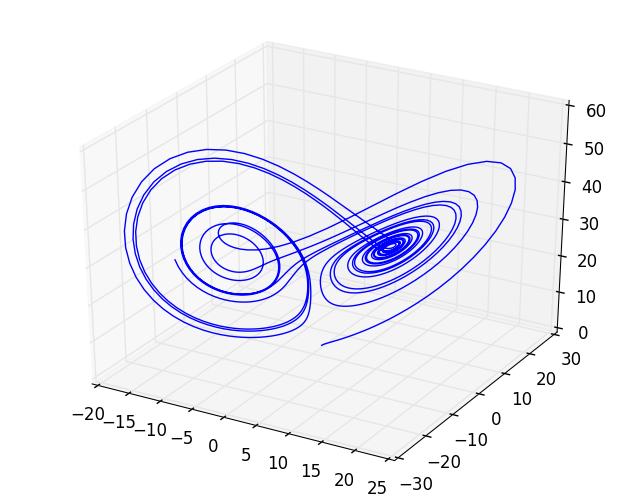

In [4]:
using SpikingNetworks

parseParameters"""
σ = 10
ρ = 28
β = 8/3"""

parseEquations"""
dx/dt = σ*(y-x)
dy/dt = x*(ρ-z)-y
dz/dt = x*y-β*z"""

net=init"""
x=[1]
y=[1]
z=[1]"""

stateMonitor"[1]"

net.dt=0.01
@time run!(net,20/net.dt)
using PyPlot
plot3D(vec(net.xRecord[1,:]),vec(net.yRecord[1,:]),vec(net.zRecord[1,:]));

## Code Generation

If you want to see the hidden codes generated by SpikingNetworks and modify the codes to fit your problem, just uncomment the line ``#println(ex...)`` in [utility.jl](https://github.com/YaoLuCNS/SpikingNetworks/blob/master/src/utility.jl).

## To do
- Add detailed documentation if other people in this community use this package
- Add more examples (including my own work)
- Adapt this package for parallel computing (need help)
- Add new computation analysis tool (I'm working on those theories, I hope I could have some results)

## Contact
luyaocns@gmail.com